# Capstone Project - The Battle of Neighborhoods

### Suitable neighborhood in Santiago to start a Hungarian restaurant.

This notebook contains multiple parts:

Part.1 A description of the problem and a discussion of the background - Week 1

Part.2 A description of the data and how it will be used to solve the problem - Week 1

Part.3 Data Acquisition , Processing and Visualization. - Week 2

Part 4. Results - Discussion - Conclusion - Week 2

## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

### Part 1 - A description of the problem and a discussion of the background.

###  Introduction:

### 1. Background

Santiago, also known as Santiago de Chile, is the capital and largest city of Chile as well as one of the largest cities in the Americas. It is the center of Chile's most densely populated region, the Santiago Metropolitan Region, whose total population is 7 million, of which more than 6 million live in the city's continuous urban area. The city is entirely located in the country's central valley. 

Santiago is the cultural, political and financial center of Chile and is home to the regional headquarters of many multinational corporations. 

Santiago generates 45% of the country's GDP. Some international institutions, such as ECLAC (Economic Commission for Latin America and the Caribbean), have their offices in Santiago. The strong economy and low government debt is attracting migrants from Europe and the United States. in addition, it is one of the most profitable and stable economies in the region.

Santiago's steady economic growth over the past few decades has transformed it into a modern metropolis. The city is now home to a growing theater and restaurant scene, extensive suburban development, dozens of shopping centers, and a rising skyline, including the tallest building in Latin America, the "Gran Torre Santiago". It includes several major universities, and has developed a modern transportation infrastructure, including a free flow toll-based, partly underground urban freeway system and the Metro de Santiago, South America's most extensive subway system.

### 2. Problem Description

First of all I would like to comment that I have been lucky to have traveled a lot and one of my best experience was about the traditional foods of Eastern Europe especially the food of Hungary.

Santiago City of Chile offers many business opportunities due to its characteristics, but there are a large number of competitors and the complexity and infrastructure of the city brings greater challenges in case of opening a business.

### 3. Objective

Downtown Santiago is considered the core of the city and it is an excellent spot for opening a Hungarian restaurant.

The question is to clarify and locate what is the neighborhood with the fewest competitors in downtown Santiago.


### 4. Target Audience

The target audience is all interested in clarifying the number of competitors in case of opening a Hungarian restaurant in the  downtown Santiago.

### Part 2 - A description of the data and how it will be used to solve the problem. 

### description of the data

The data consists of the main neighborhoods in Santiago that will be processed and disaggregated using Foursquare's location data to locate the main places and businesses, followed by performing statistical analysis and visualizations to locate the neighborhood with the fewest competitors.

Firstly, to obtain the names, latitude and longitude of the main neighborhoods of the city of Santiago, it will be necessary to scrape the following wikipedia page.
https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile

Secondly, since not all the required neighborhoods are on the web page from above, it will also be necessary to get neighborhoods from the page below that allow extracting a KML file that will be transformed into an Excel file using Google Earth.
https://www.google.com/maps/d/viewer?ie=UTF8&oe=UTF8&msa=0&mid=1ACWDQ2UW_t_jLBHcV49D4CuIWLE&ll=-33.49700571058003%2C-70.633807&z=11

Lastly, to obtain exactly the requested names of the neighborhoods in downtown Santiago, it will be necessary to scrape the following wikipedia page.
https://es.wikipedia.org/wiki/Anexo:Barrios_de_Santiago_de_Chile

Once the data is obtained and processed from the first three steps, Foursquare location data will be performed to get the competitors and revise other aspects, in addition. The necessary statistical analysis will be performed to clarify the problem.

### Part.3 Data Acquisition - Processing - Visualization. (Week 2)

### 3. Methodology 

### Data Acquisition , Processing and Visualization.

The overall task is done by an iterative procedure to process and form the necessary charts by means of scraping and forming dataframes which would permit to form the corresponding visualizations.

The visualization would be done mainly by map plots and bar plots to locate the neighborhood with fewest competitors.

Some of the data are in Spanish, thus it is necessary to translate them except the names of the neighborhoods.

The first web scraping would be done by using BeautifulSoup library and it corresponds to the main neighborhoods of each capital city per region in Chile that are conveniently arranged together with is longitude and latitude and other data. This is a wikipedia's page that permits to get the information by means of a wikitable sortable table.

This information would be clean and process with the aim of obtaining a dataframe to display only the neighborhoods of Santiago City.

Because not all the required neighborhoods are in the first web scraping. It would be necessary a second web scraping.

This second action would obtain the data from a web page that allows the data to be downloaded in a KML file, therefore, through Google Earth, the data is obtained through a cvs file that permits to form a second data frame.

As a third action the first two dataframes would be merged to get the total neighborhoods and visualize the main neighborhoods in Santiago City.

The last web scraping is be done by using BeautifulSoup library in a wikipedia page that has the main neighborhoods from Downtown Santiago. Therefore allowing us to do the same procedure as the first web scraping because it has a wikitable sortable table as well.

Now we have the dataframes to obtain the latitude and longitude from the Downtown's neighborhoods by matching the resulting dataframes and dropping the unnecessary columns to form a new dataframe to visualize the neighborhoods within Downtown.

The following objective would be to create a dataframe to see the top 10 Common venues per neighborhood in Downtown by means of using the Foursquare location data to explore the Neighborhoods and put that into a pandas dataframe.

Once the dataframe is done the direct competitors would be extracting to create a new dataframe of competitors with the aim of plotting a bar chart and visualize the number of them per neighborhood.

The previous tasks showed that the neighborhood "Barrio Santa Elena" is the place with fewest competitors.

Now a different approach by using "K-Means Clustering" would be taken by clustering the neighborhoods by similarities and visualizing the numbers of competitors per cluster.

The clustering and subsequent visualization showed that the neighborhood     "Barrio santa Elena" the place with fewest competitors and it is also standing out according to similarities.


## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 2)

### 1. Download and Explore the Datasets

### Scrap content from wiki page

In [471]:
# import the library we use to open URLs
import urllib.request

# specify which URL/web page we are going to be scraping
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile"

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

# take a look. 
# print(soup.prettify())

In [472]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")

# take a look.
# print(all_tables)

In [462]:
# we can  see that the class of our chosen table is ”wikitable sortable”
right_table=soup.find('table', class_='wikitable sortable')

### Tranform the data into a pandas dataframe

In [463]:
# Loop through the rows and storing the datas.

A, B, C, D, E, F, G, H, I, J, K, M ,Z = [], [], [], [], [], [], [], [], [], [], [], [], [],

for row in right_table.findAll('tr'):
    cells2=row.findAll('th')
    if len(cells2)>=1:
        Z.append(str.rstrip(cells2[0].find(text=True))) 
        Z.append(str.rstrip(cells2[1].find(text=True)))
        Z.append(str.rstrip(cells2[2].find(text=True)))
        Z.append(str.rstrip(cells2[3].find(text=True))) 
        Z.append(str.rstrip(cells2[4].find(text=True))) 
        Z.append(str.rstrip(cells2[5].find(text=True))) 
        Z.append(str.rstrip(cells2[6].find(text=True))) 
        Z.append(str.rstrip(cells2[7].find(text=True))) 
        Z.append(str.rstrip(cells2[8].find(text=True))) 
        Z.append(str.rstrip(cells2[9].find(text=True))) 
        Z.append(str.rstrip(cells2[10].find(text=True)))
    cells=row.findAll('td')
    if len(cells)>=1:
        A.append(str.rstrip(cells[0].find(text=True)))
        B.append(str.rstrip(cells[1].find(text=True)))
        C.append(str.rstrip(cells[2].find(text=True)))
        D.append(str.rstrip(cells[3].find(text=True)))
        E.append(str.rstrip(cells[4].find(text=True)))
        F.append(str.rstrip(cells[5].find(text=True)))
        G.append(str.rstrip(cells[6].find(text=True)))
        H.append(str.rstrip(cells[7].find(text=True)))
        I.append(str.rstrip(cells[8].find(text=True)))
        J.append(str.rstrip(cells[9].find(text=True)))
        K.append(str.rstrip(cells[10].find(text=True)))
        M.append(str.rstrip(cells[11].find(text=True)))

In [464]:
# Forming and Arranging the data frame
import pandas as pd
data=pd.DataFrame(A,columns=[Z[0]])
data[Z[1]]=B
data[Z[2]]=C
data[Z[3]]=D
data[Z[5]]=F
data[Z[6]]=G
data[Z[7]]=H
data[Z[8]]=I
data[Z[9]]=K
data[Z[10]]=M
data.head()

,CUT (Código Único Territorial),Nombre,,Provincia,Superficie,Población,Densidad,IDH 2005,Latitud,Longitud
0,15101,Arica,,Arica,4799.4,221364,0.46,38.4,"-18°27'18""","-70°17'24"""
1,15102,Camarones,,Arica,3927,1255,0.32,0.751,"-19°1'1.2""","-69°52'1.2"""
2,15201,Putre,,Parinacota,5902.5,2765,0.47,0.707,"-18°12'0""","-69°34'58.8"""
3,15202,General Lagos,,Parinacota,2244.4,684,0.31,0.67,"-17°39'10.8""","-69°38'6"""
4,01101,Iquique,,Iquique,2242.1,191468,85.4,0.766,"-20°14'38.4""","-70°8'20.4"""


### Transform Spanish Labels into English Labels

As we can see, the labels are in Spanish, so it is necessary to convert them to English.

In [465]:
data= data.rename(columns={'CUT (Código Único Territorial)': 'CUT (Unique Territorial Code)', 'Nombre': 'neighborhood', 'Provincia': 'Province', 'Superficie': 'Area', 'Población': 'Population', 'Densidad': 'Density', 'Latitud': 'Latitude', 'Longitud': 'Longitude' })
data.head()

,CUT (Unique Territorial Code),neighborhood,,Province,Area,Population,Density,IDH 2005,Latitude,Longitude
0,15101,Arica,,Arica,4799.4,221364,0.46,38.4,"-18°27'18""","-70°17'24"""
1,15102,Camarones,,Arica,3927,1255,0.32,0.751,"-19°1'1.2""","-69°52'1.2"""
2,15201,Putre,,Parinacota,5902.5,2765,0.47,0.707,"-18°12'0""","-69°34'58.8"""
3,15202,General Lagos,,Parinacota,2244.4,684,0.31,0.67,"-17°39'10.8""","-69°38'6"""
4,01101,Iquique,,Iquique,2242.1,191468,85.4,0.766,"-20°14'38.4""","-70°8'20.4"""


### Transform degrees, minutes, seconds (DMS) to coordinates to decimal degrees (DD).

As we can see, the Latitude and Longitude columns are in (DMS),so it is necessary to convert them to (DD).

In [466]:
# converting degrees, minutes, seconds (DMS) to coordinates to decimal degrees (DD).
import re
K_new = []
for x in data["Latitude"]:
    degrees, minutes, seconds = re.split('[°\']', x[:-1])
    dd = float(degrees) - float(minutes)/60 - float(seconds)/(60*60)
    K_new.append(dd)
    
M_new = []
for x in data["Longitude"]:
    degrees, minutes, seconds = re.split('[°\']', x[:-1])
    dd = float(degrees) - float(minutes)/60 - float(seconds)/(60*60)
    M_new.append(dd)

# Dropping unnecessary columns.    
data.drop(["Latitude","Longitude"], axis=1, inplace=True) 

# addind the convertion to the datafram "df"
data[Z[9]]=K_new
data[Z[10]]=M_new

# renaming some columns.
data= data.rename(columns={'Latitud': 'Latitude', 'Longitud': 'Longitude' })

data.head()

,CUT (Unique Territorial Code),neighborhood,,Province,Area,Population,Density,IDH 2005,Latitude,Longitude
0,15101,Arica,,Arica,4799.4,221364,0.46,38.4,-18.455,-70.290
1,15102,Camarones,,Arica,3927,1255,0.32,0.751,-19.017,-69.867
2,15201,Putre,,Parinacota,5902.5,2765,0.47,0.707,-18.200,-69.583
3,15202,General Lagos,,Parinacota,2244.4,684,0.31,0.67,-17.653,-69.635
4,01101,Iquique,,Iquique,2242.1,191468,85.4,0.766,-20.244,-70.139


In [467]:
# selecting only the province of santiago (the province of Santigo correspond to the City of Santiago it is just a different way to name it)
data = data[data["Province"].str.match('Santiago')].reset_index(drop=True)
data.head()

,CUT (Unique Territorial Code),neighborhood,,Province,Area,Population,Density,IDH 2005,Latitude,Longitude
0,13101,Santiago,,Santiago,23.2,404495,17435.1,0.807,-33.437222,-70.657222
1,13102,Cerrillos,,Santiago,21,80832,3849.1,0.743,-33.500000,-70.716667
2,13103,Cerro Navia,,Santiago,11,132622,12056.5,0.683,-33.422000,-70.735000
3,13104,Conchalí,,Santiago,10.7,126955,11865.0,0.707,-33.380000,-70.675000
4,13105,El Bosque,,Santiago,14.2,162505,11444.0,0.711,-33.567000,-70.675000


In [468]:
# Dropping unnecessary columns.
data.drop(["CUT (Unique Territorial Code)","Province","Area","Population","Density","IDH 2005"], axis=1, inplace=True) # drop some columns
data.head()

,neighborhood,,Latitude,Longitude
0,Santiago,,-33.437222,-70.657222
1,Cerrillos,,-33.500000,-70.716667
2,Cerro Navia,,-33.422000,-70.735000
3,Conchalí,,-33.380000,-70.675000
4,El Bosque,,-33.567000,-70.675000


In [469]:
# checking 
data.shape

(32, 4)

### Cleaning and Processing KML file 

The following file comes from the above web page and it is a KML which was converted into a csv file using google earth:
https://www.google.com/maps/d/viewer?ie=UTF8&oe=UTF8&msa=0&mid=1ACWDQ2UW_t_jLBHcV49D4CuIWLE&ll=-33.49700571058003%2C-70.633807&z=11

In [470]:
data_2 = pd.read_excel("barrios_santiago.xlsx", header=0) # Load Data From CSV File
data_2[0:]

,ns1:name,id,ns1:Icon,ns1:color,ns1:name2,ns1:open,ns1:listItemType,ns1:state,ns1:href,ns1:bgColor,...,ns1:color26,id27,ns1:key,ns1:styleUrl28,ns1:name29,ns1:name30,ns1:styleUrl31,ns1:coordinates32,ns1:tessellate,ns1:coordinates33
0,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,check,open,files/mysavedplaces_open.png,00ffffff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,check,closed,files/mysavedplaces_closed.png,00ffffff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Capa sin nombre,Barrio Yungay,#icon-22-nodesc,"-70.676489,-33.440736,0",NaN,NaN
183,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Capa sin nombre,Barrio Estacion,#icon-22-nodesc,"-70.67826700000001,-33.453321,0",NaN,NaN
184,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Capa sin nombre,"Barrio Las Perdices, Enaco",#icon-22-nodesc,"-70.55291200000001,-33.552089,0",NaN,NaN
185,My Places.kmz,sn_noicon,NaN,00ffffff,My Places,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Capa sin nombre,Barrio La Glorieta,#icon-22-nodesc,"-70.758374,-33.398656,0",NaN,NaN


In [12]:
# selecting specific columns and rows
data_2 = data_2.loc[93:185, "ns1:name30":"ns1:coordinates33"].reset_index(drop=True)  # selecting specific columns and rows
data_2.head()

,ns1:name30,ns1:styleUrl31,ns1:coordinates32,ns1:tessellate,ns1:coordinates33
0,Barrio Plaza,#icon-22-nodesc,"-70.72076199999999,-33.353821,0",NaN,NaN
1,Barrio el Golf,#icon-22-nodesc,"-70.592179,-33.413998,0",NaN,NaN
2,Barrio Pedro de Valdivia Norte,#icon-22-nodesc,"-70.616013,-33.418153,0",NaN,NaN
3,Barrio La Faena,#icon-22-nodesc,"-70.55555099999999,-33.468341,0",NaN,NaN
4,Barrio Londres,#icon-22-nodesc,"-70.64822700000001,-33.444638,0",NaN,NaN


In [13]:
# Dropping unnecessary columns.
data_2.drop(['ns1:styleUrl31','ns1:tessellate',"ns1:coordinates33"], axis=1, inplace=True) 
data_2.head()

,ns1:name30,ns1:coordinates32
0,Barrio Plaza,"-70.72076199999999,-33.353821,0"
1,Barrio el Golf,"-70.592179,-33.413998,0"
2,Barrio Pedro de Valdivia Norte,"-70.616013,-33.418153,0"
3,Barrio La Faena,"-70.55555099999999,-33.468341,0"
4,Barrio Londres,"-70.64822700000001,-33.444638,0"


In [14]:
# renaming columns.
data_2= data_2.rename(columns={'ns1:name30': 'neighborhood', 'ns1:coordinates32': 'coordinates'})
data_2.head()

,neighborhood,coordinates
0,Barrio Plaza,"-70.72076199999999,-33.353821,0"
1,Barrio el Golf,"-70.592179,-33.413998,0"
2,Barrio Pedro de Valdivia Norte,"-70.616013,-33.418153,0"
3,Barrio La Faena,"-70.55555099999999,-33.468341,0"
4,Barrio Londres,"-70.64822700000001,-33.444638,0"


In [15]:
# adjusting the coordinates' column.
data_2[['Longitude','Latitude',"leftover"]] = data_2.coordinates.str.split(",",expand=True,)
data_2.head()

,neighborhood,coordinates,Longitude,Latitude,leftover
0,Barrio Plaza,"-70.72076199999999,-33.353821,0",-70.72076199999999,-33.353821,0
1,Barrio el Golf,"-70.592179,-33.413998,0",-70.592179,-33.413998,0
2,Barrio Pedro de Valdivia Norte,"-70.616013,-33.418153,0",-70.616013,-33.418153,0
3,Barrio La Faena,"-70.55555099999999,-33.468341,0",-70.55555099999999,-33.468341,0
4,Barrio Londres,"-70.64822700000001,-33.444638,0",-70.64822700000001,-33.444638,0


In [16]:
# Dropping unnecessary columns.
data_2.drop(["coordinates",'leftover'], axis=1, inplace=True) 
data_2.head()

,neighborhood,Longitude,Latitude
0,Barrio Plaza,-70.72076199999999,-33.353821
1,Barrio el Golf,-70.592179,-33.413998
2,Barrio Pedro de Valdivia Norte,-70.616013,-33.418153
3,Barrio La Faena,-70.55555099999999,-33.468341
4,Barrio Londres,-70.64822700000001,-33.444638


In [17]:
# checking 
data_2.shape

(93, 3)

In [18]:
# merging the dataframes
data_3 = pd.concat([data, data_2]).reset_index(drop=True) 
data_3.head()

,neighborhood,,Latitude,Longitude
0,Santiago,,-33.4372,-70.6572
1,Cerrillos,,-33.5,-70.7167
2,Cerro Navia,,-33.422,-70.735
3,Conchalí,,-33.38,-70.675
4,El Bosque,,-33.567,-70.675


In [19]:
# checking 
data_3.shape

(125, 4)

### Visualization of the resulting data  (Visualization N°1)

the resulting data will be visualized to check the results

In [20]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Santiago de Chile'
geolocator = Nominatim(user_agent="Santiago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santiago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santiago are -33.4377968, -70.6504451.


In [423]:
# create map of Santiago using latitude and longitude values
import folium # map rendering library
map_santiago = folium.Map(location=[latitude, longitude], zoom_start=10.45)

# add markers to map
for lat, lng, borough in zip(data_3['Latitude'], data_3['Longitude'], data_3['neighborhood']):
    label = '{}, {}'.format(data_3, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

### Scrap content from wiki page to obtain the main neighborhoods from downtown Santiago

In [23]:
# to get the required neighborhood from downtown santiago it was necessary to explore and store the data into a csv file.
# source : https://es.wikipedia.org/wiki/Anexo:Barrios_de_Santiago_de_Chile

data_4 = pd.read_excel("downtown_santiago.xlsx", header=0) # Load Data From CSV File
data_4.head()

,neighborhood
0,Barrio Balmaceda
1,Barrio Brasil
2,Barrio Bogotá
3,Barrio Cívico de Santiago
4,Barrio Club Hípico


In [24]:
# selecting only the required neighborhoods
fl_data = data_3[data_3['neighborhood'].isin(data_4["neighborhood"])].reset_index(drop=True)  

# Dropping unnecessary columns.
fl_data.drop([""], axis=1, inplace=True) 
fl_data.head()

,neighborhood,Latitude,Longitude
0,Barrio Brasil,-33.478918,-70.605525
1,Barrio San Borja,-33.440502,-70.639246
2,Barrio San Isidro,-33.449145,-70.643158
3,Barrio Sierra Bella,-33.470505,-70.631265
4,Barrio Santa Elena,-33.477905,-70.62578600000001


In [25]:
# check
fl_data.shape

(11, 3)

### Visualization of the resulting data 2 (Visualization N°2)

the resulting data will be visualized to check the results

In [424]:
# create map of Santiago using latitude and longitude values
import folium # map rendering library
map_santiago = folium.Map(location=[latitude, longitude], zoom_start=12.45)

# add markers to map
for lat, lng, borough in zip(fl_data['Latitude'], fl_data['Longitude'], fl_data['neighborhood']):
    label = '{}, {}'.format(fl_data, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

###### 2. Use the Foursquare API to explore the Neighborhoods

Define Foursquare Credentials and Version

In [27]:
CLIENT_ID = ### # your Foursquare ID
CLIENT_SECRET = ### # your Foursquare Secret
VERSION = ### # Foursquare API version

In [28]:
# Get the first neighborhood's name.
fl_data.loc[0, 'neighborhood']

'Barrio Brasil'

In [29]:
neighborhood_latitude = fl_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = fl_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = fl_data.loc[0, 'neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Barrio Brasil are -33.478918, -70.605525.


In [30]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


# Send the GET request 
import requests # importing respective library
results = requests.get(url).json()

In [31]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues = results['response']['groups'][0]['items']

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

<ipython-input-32-794f8cca777a>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,El Rincón de Azócar,Seafood Restaurant,-33.481958,-70.606246
1,Restaurant Payllay,Peruvian Restaurant,-33.476794,-70.606198
2,Botilleria La Promo,Liquor Store,-33.479174,-70.606587
3,Lomo Liso,Restaurant,-33.482252,-70.603555
4,Total Soccer,Soccer Stadium,-33.477251,-70.610231


In [33]:
# And how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


### 3. Explore Neighborhoods in Downtown Santiago

Let's create a function to repeat the same process to all the respective neighborhoods

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe santiago_venues

In [35]:
santiago_venues = getNearbyVenues(names=fl_data['neighborhood'],
                                   latitudes=fl_data['Latitude'],
                                   longitudes=fl_data['Longitude']
                                  )

Barrio Brasil
Barrio San Borja
Barrio San Isidro
Barrio Sierra Bella
Barrio Santa Elena
Barrio Balmaceda
Barrio República
Barrio Meiggs
Barrio San Diego
Barrio París-Londres
Barrio Yungay


In [37]:
# Let's check the size of the resulting dataframe
print(santiago_venues.shape)
santiago_venues.head()

(353, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barrio Brasil,-33.478918,-70.605525,El Rincón de Azócar,-33.481958,-70.606246,Seafood Restaurant
1,Barrio Brasil,-33.478918,-70.605525,Restaurant Payllay,-33.476794,-70.606198,Peruvian Restaurant
2,Barrio Brasil,-33.478918,-70.605525,Botilleria La Promo,-33.479174,-70.606587,Liquor Store
3,Barrio Brasil,-33.478918,-70.605525,Lomo Liso,-33.482252,-70.603555,Restaurant
4,Barrio Brasil,-33.478918,-70.605525,Total Soccer,-33.477251,-70.610231,Soccer Stadium


Let's check how many venues were returned for each neighborhood

In [38]:
santiago_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barrio Balmaceda,19,19,19,19,19,19
Barrio Brasil,5,5,5,5,5,5
Barrio Meiggs,52,52,52,52,52,52
Barrio París-Londres,100,100,100,100,100,100
Barrio República,32,32,32,32,32,32
Barrio San Borja,32,32,32,32,32,32
Barrio San Diego,18,18,18,18,18,18
Barrio San Isidro,41,41,41,41,41,41
Barrio Santa Elena,7,7,7,7,7,7


Let's find out how many unique categories can be curated from all the returned venues

In [39]:
print('There are {} uniques categories.'.format(len(santiago_venues['Venue Category'].unique())))

There are 127 uniques categories.


### Analyze Each Neighborhood

In [40]:
# one hot encoding
santiago_onehot = pd.get_dummies(santiago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago_onehot['Neighborhood'] = santiago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago_onehot.columns[-1]] + list(santiago_onehot.columns[:-1])
santiago_onehot = santiago_onehot[fixed_columns]

santiago_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,...,Sports Club,Supermarket,Sushi Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Veterinarian,Wine Bar,Women's Store,Yoga Studio
0,Barrio Brasil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barrio Brasil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barrio Brasil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barrio Brasil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barrio Brasil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [41]:
santiago_onehot.shape

(353, 128)

### 4. Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [42]:
santiago_grouped = santiago_onehot.groupby('Neighborhood').mean().reset_index()
santiago_grouped

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,...,Sports Club,Supermarket,Sushi Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Veterinarian,Wine Bar,Women's Store,Yoga Studio
0,Barrio Balmaceda,0.000000,0.0000,0.000000,0.052632,0.000000,0.00000,0.000000,0.052632,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000
1,Barrio Brasil,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000
2,Barrio Meiggs,0.000000,0.0000,0.000000,0.000000,0.038462,0.00000,0.000000,0.000000,0.019231,...,0.00,0.019231,0.000000,0.00,0.019231,0.000000,0.00000,0.00000,0.000000,0.00000
3,Barrio París-Londres,0.000000,0.0000,0.000000,0.000000,0.000000,0.01000,0.000000,0.010000,0.010000,...,0.01,0.010000,0.020000,0.04,0.000000,0.020000,0.00000,0.00000,0.000000,0.00000
4,Barrio República,0.000000,0.0000,0.031250,0.000000,0.031250,0.00000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.031250,0.00,0.000000,0.031250,0.00000,0.00000,0.000000,0.00000
5,Barrio San Borja,0.000000,0.0625,0.062500,0.000000,0.000000,0.00000,0.000000,0.000000,0.031250,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.03125,0.000000,0.03125
6,Barrio San Diego,0.000000,0.0000,0.000000,0.000000,0.055556,0.00000,0.055556,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.055556,0.00000,0.00000,0.055556,0.00000
7,Barrio San Isidro,0.024390,0.0000,0.000000,0.000000,0.000000,0.02439,0.000000,0.000000,0.024390,...,0.00,0.024390,0.121951,0.00,0.000000,0.000000,0.02439,0.00000,0.000000,0.00000
8,Barrio Santa Elena,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000
9,Barrio Sierra Bella,0.090909,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.181818,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000


Let's confirm the new size

In [43]:
santiago_grouped.shape

(11, 128)

Let's find out how many unique categories can be curated from all the returned venues

In [44]:
print('There are {} uniques categories.'.format(len(santiago_venues['Venue Category'].unique())))

There are 127 uniques categories.


### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [434]:
import numpy as np # library to handle data in a vectorized manner
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = santiago_grouped['Neighborhood']

for ind in np.arange(santiago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(santiago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(11)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Balmaceda,Peruvian Restaurant,Pharmacy,South American Restaurant,Pizza Place,Mobile Phone Shop,Chinese Restaurant,Farmers Market,Martial Arts Dojo,Park,Skate Park
1,Barrio Brasil,Peruvian Restaurant,Liquor Store,Soccer Stadium,Restaurant,Seafood Restaurant,Discount Store,Dive Bar,Donut Shop,Electronics Store,Event Space
2,Barrio Meiggs,Shopping Mall,Pharmacy,Fried Chicken Joint,Sandwich Place,Restaurant,Café,Business Service,Asian Restaurant,Fast Food Restaurant,Nightclub
3,Barrio París-Londres,Coffee Shop,Sandwich Place,Pizza Place,Bookstore,Plaza,Restaurant,Café,Theater,Chinese Restaurant,Hotel
4,Barrio República,Pizza Place,Chinese Restaurant,Pub,Hot Dog Joint,Burrito Place,Bus Station,Restaurant,Lounge,Food,Martial Arts Dojo
5,Barrio San Borja,Hotel,Art Gallery,Art Museum,Gift Shop,Coffee Shop,Park,Yoga Studio,Mountain,Restaurant,Deli / Bodega
6,Barrio San Diego,Diner,Restaurant,Men's Store,Bus Station,Bus Line,Café,Food & Drink Shop,General Entertainment,Flea Market,Bistro
7,Barrio San Isidro,Pizza Place,Sushi Restaurant,Restaurant,Peruvian Restaurant,Latin American Restaurant,Fried Chicken Joint,Indian Restaurant,Gym / Fitness Center,Playground,Pharmacy
8,Barrio Santa Elena,Peruvian Restaurant,Farmers Market,Convenience Store,Sandwich Place,Park,Shoe Store,Bakery,Food,Flea Market,Fast Food Restaurant
9,Barrio Sierra Bella,BBQ Joint,American Restaurant,South American Restaurant,Health Food Store,Italian Restaurant,Paper / Office Supplies Store,Pet Store,Plaza,Chinese Restaurant,Hot Dog Joint


### 5. Now let's select all the direct competitors from the top 10 venues of each neighborhood and create its respective dataframe

In [435]:
# sorting the dataframe for looking data which contains the word "Restaurant"
competitors = []
for x in neighborhoods_venues_sorted.columns.values:
    for y in neighborhoods_venues_sorted[x]:
        if "Restaurant" in y:
            competitors.append(y)

# eliminating repetitive data.         
competitors_a = []
for x in competitors:
    if x not in competitors_a:
        competitors_a.append(x)
    else:
        pass
    
# Direct competitors from the top 10 venues of each neighborhood.
competitors_a       

['Peruvian Restaurant',
 'Chinese Restaurant',
 'Restaurant',
 'Sushi Restaurant',
 'American Restaurant',
 'South American Restaurant',
 'Seafood Restaurant',
 'Latin American Restaurant',
 'Italian Restaurant',
 'Indian Restaurant',
 'Asian Restaurant',
 'Fast Food Restaurant']

### Let's find out the number of competitors by Neighborhood

In [436]:
competitors_a.insert(0,"Neighborhood")

santiago_onehot_2 = santiago_onehot[competitors_a[0:]]
santiago_onehot_2

,Neighborhood,Peruvian Restaurant,Chinese Restaurant,Restaurant,Sushi Restaurant,American Restaurant,South American Restaurant,Seafood Restaurant,Latin American Restaurant,Italian Restaurant,Indian Restaurant,Asian Restaurant,Fast Food Restaurant
0,Barrio Brasil,0,0,0,0,0,0,1,0,0,0,0,0
1,Barrio Brasil,1,0,0,0,0,0,0,0,0,0,0,0
2,Barrio Brasil,0,0,0,0,0,0,0,0,0,0,0,0
3,Barrio Brasil,0,0,1,0,0,0,0,0,0,0,0,0
4,Barrio Brasil,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Barrio Yungay,0,0,0,0,0,0,0,0,0,0,0,0
349,Barrio Yungay,0,0,0,0,0,0,0,0,0,0,0,0
350,Barrio Yungay,0,0,0,0,0,0,0,0,0,0,0,0
351,Barrio Yungay,0,0,0,0,0,0,0,0,0,0,0,0


Sorting and Storing the necessary data to form a Dataframe.

In [437]:
# storing the Neighborhoods
data_n1 = []
for x in neighborhoods_venues_sorted["Neighborhood"]:
    data_n1.append(x)
  
# # storing the number of competitors
data_n2=[]    
for y in data_n1:
    data_n2.append(santiago_onehot_2[santiago_onehot_2["Neighborhood"].str.contains(y)].reset_index(drop=True))

# adding up accordingly  
data_n3 = []
for z in data_n2:
    z.drop(["Neighborhood"], axis=1, inplace=True) 
    data_n3.append(z.sum())
    
# arranging the resulting datas
test0 = data_n3[0].to_frame().T
test1 = data_n3[1].to_frame().T
test2 = data_n3[2].to_frame().T
test3 = data_n3[3].to_frame().T
test4 = data_n3[4].to_frame().T
test5 = data_n3[5].to_frame().T
test6 = data_n3[6].to_frame().T
test7 = data_n3[7].to_frame().T
test8 = data_n3[8].to_frame().T
test9 = data_n3[9].to_frame().T
test10 = data_n3[10].to_frame().T
test_a1 = neighborhoods_venues_sorted["Neighborhood"]

### Let's create the competiros' dataframe

Arranging the data

In [438]:
# merging the information
merge_test = pd.concat([test0, test1, test2, test3, test4, test5, test6, test7, test8, test9, test10], ignore_index=True)
merge_test2 = pd.concat([test_a1,merge_test], axis=1)

# Placing the Neighborhood as Labels
merge_test2.set_index("Neighborhood", inplace = True)
merge_test2


,Peruvian Restaurant,Chinese Restaurant,Restaurant,Sushi Restaurant,American Restaurant,South American Restaurant,Seafood Restaurant,Latin American Restaurant,Italian Restaurant,Indian Restaurant,Asian Restaurant,Fast Food Restaurant
Neighborhood,,,,,,,,,,,,
Barrio Balmaceda,4,1,0,0,0,1,1,0,0,0,0,0
Barrio Brasil,1,0,1,0,0,0,1,0,0,0,0,0
Barrio Meiggs,0,1,3,0,0,1,0,0,0,0,2,2
Barrio París-Londres,1,4,4,2,0,2,0,1,2,0,0,0
Barrio República,1,3,1,1,0,1,0,0,0,0,1,0
Barrio San Borja,0,0,1,0,0,0,0,1,1,0,0,0
Barrio San Diego,0,0,1,0,0,1,0,0,0,0,1,0
Barrio San Isidro,2,1,3,5,1,0,0,2,0,1,0,1
Barrio Santa Elena,1,0,0,0,0,0,0,0,0,0,0,0


Adding all the competitors by neighborhood

In [439]:
# add Competitors column and adding all the competitors by neighborhood
merge_test2['Competitors'] = merge_test2.sum(axis=1)

# sorting the data in numerical order according to the column "Competitors"
competitor_f = merge_test2.sort_values(by ='Competitors' )

# Displaying the resulting dataframe
competitor_f

,Peruvian Restaurant,Chinese Restaurant,Restaurant,Sushi Restaurant,American Restaurant,South American Restaurant,Seafood Restaurant,Latin American Restaurant,Italian Restaurant,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Competitors
Neighborhood,,,,,,,,,,,,,
Barrio Santa Elena,1,0,0,0,0,0,0,0,0,0,0,0,1
Barrio Brasil,1,0,1,0,0,0,1,0,0,0,0,0,3
Barrio San Borja,0,0,1,0,0,0,0,1,1,0,0,0,3
Barrio San Diego,0,0,1,0,0,1,0,0,0,0,1,0,3
Barrio Sierra Bella,0,1,0,0,1,1,0,0,1,0,0,0,4
Barrio Yungay,2,0,2,0,0,0,0,2,0,0,0,0,6
Barrio Balmaceda,4,1,0,0,0,1,1,0,0,0,0,0,7
Barrio República,1,3,1,1,0,1,0,0,0,0,1,0,8
Barrio Meiggs,0,1,3,0,0,1,0,0,0,0,2,2,9


### Visualization of the total number of competitors per neighborhood.

Text(0.5, 1.0, 'Number of Competitors by Neighborhood (Chart N°1)')

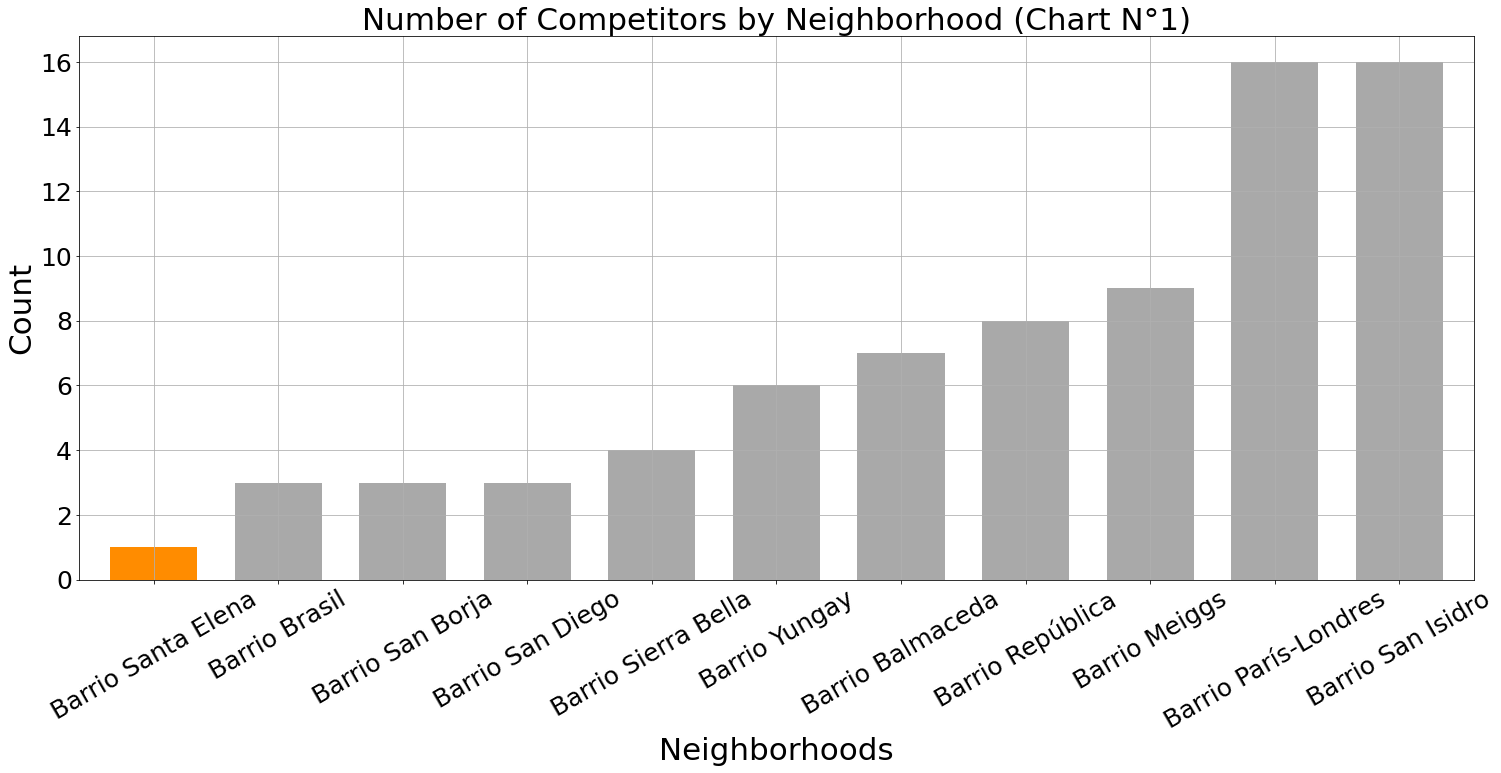

In [440]:
# Matplotlib and associated plotting modules
from matplotlib import pyplot as plt

colors = ['darkorange', 'darkgrey', 'darkgrey', 'darkgrey','darkgrey','darkgrey','darkgrey', 'darkgrey','darkgrey','darkgrey','darkgrey']
competitor_f["Competitors"].plot(kind='bar', figsize=(25, 10), rot=90, fontsize=25,  width=0.7, color=colors)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel('Neighborhoods', size=31)
plt.ylabel('Count', size=31)
plt.grid(True)
plt.title('Number of Competitors by Neighborhood in Downtown Santiago (Chart N°1)', size=31)

The chart above show us that the neighborhood "Barrio Santa Elena" has the fewest competitors.

### 6. Now let's take a different approach by clustering the neighborhoods
Run k-means to cluster the neighborhood into 5 clusters

In [441]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

santiago_grouped_clustering = santiago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(santiago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

### Visualization of the resulting clusters (Visualization N°3)
### The neighborhood "Barrio Santa Elena" is highlighted in red.

In [442]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.47)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(santiago_merged['Latitude'], santiago_merged['Longitude'], santiago_merged['neighborhood'], santiago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-3],
        fill=True,
        fill_color=rainbow[cluster-3],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

let's examine the clusters

In [443]:
cluster_1 = santiago_merged.loc[santiago_merged['Cluster Labels'] == 2, santiago_merged.columns[[0] + list(range(4, santiago_merged.shape[1]))]]
cluster_1

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Barrio Santa Elena,Peruvian Restaurant,Farmers Market,Convenience Store,Sandwich Place,Park,Shoe Store,Bakery,Food,Flea Market,Fast Food Restaurant


In [444]:
cluster_2 = santiago_merged.loc[santiago_merged['Cluster Labels'] == 1, santiago_merged.columns[[0] + list(range(4, santiago_merged.shape[1]))]]
cluster_2

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Brasil,Peruvian Restaurant,Liquor Store,Soccer Stadium,Restaurant,Seafood Restaurant,Discount Store,Dive Bar,Donut Shop,Electronics Store,Event Space


In [445]:
cluster_3 = santiago_merged.loc[santiago_merged['Cluster Labels'] == 0, santiago_merged.columns[[0] + list(range(4, santiago_merged.shape[1]))]]
cluster_3

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barrio San Borja,Hotel,Art Gallery,Art Museum,Gift Shop,Coffee Shop,Park,Yoga Studio,Mountain,Restaurant,Deli / Bodega
2,Barrio San Isidro,Pizza Place,Sushi Restaurant,Restaurant,Peruvian Restaurant,Latin American Restaurant,Fried Chicken Joint,Indian Restaurant,Gym / Fitness Center,Playground,Pharmacy
3,Barrio Sierra Bella,BBQ Joint,American Restaurant,South American Restaurant,Health Food Store,Italian Restaurant,Paper / Office Supplies Store,Pet Store,Plaza,Chinese Restaurant,Hot Dog Joint
5,Barrio Balmaceda,Peruvian Restaurant,Pharmacy,South American Restaurant,Pizza Place,Mobile Phone Shop,Chinese Restaurant,Farmers Market,Martial Arts Dojo,Park,Skate Park
6,Barrio República,Pizza Place,Chinese Restaurant,Pub,Hot Dog Joint,Burrito Place,Bus Station,Restaurant,Lounge,Food,Martial Arts Dojo
7,Barrio Meiggs,Shopping Mall,Pharmacy,Fried Chicken Joint,Sandwich Place,Restaurant,Café,Business Service,Asian Restaurant,Fast Food Restaurant,Nightclub
8,Barrio San Diego,Diner,Restaurant,Men's Store,Bus Station,Bus Line,Café,Food & Drink Shop,General Entertainment,Flea Market,Bistro
9,Barrio París-Londres,Coffee Shop,Sandwich Place,Pizza Place,Bookstore,Plaza,Restaurant,Café,Theater,Chinese Restaurant,Hotel
10,Barrio Yungay,Bar,Peruvian Restaurant,Museum,Restaurant,Latin American Restaurant,Performing Arts Venue,Historic Site,Metro Station,Event Space,Coffee Shop


### Creating a Dataframe to Visualize the number of competitors by Cluster.

In [449]:
# Import pandas library 
import pandas as pd 
  
# initialize list of lists 
data_clusters = [[len(cluster_1)], [len(cluster_2)], [len(cluster_3)]] 
  
# Create the pandas DataFrame 
clusters_dataframe = pd.DataFrame(data_clusters, columns = ['size'], index =['Cluster_1', 'Cluster_2', "Cluster_3"]) 
  
# print dataframe. 
clusters_dataframe 

,size
Cluster_1,1
Cluster_2,1
Cluster_3,9


Text(0.5, 1.0, 'Number of Competitors by Cluster (Chart N°2)')

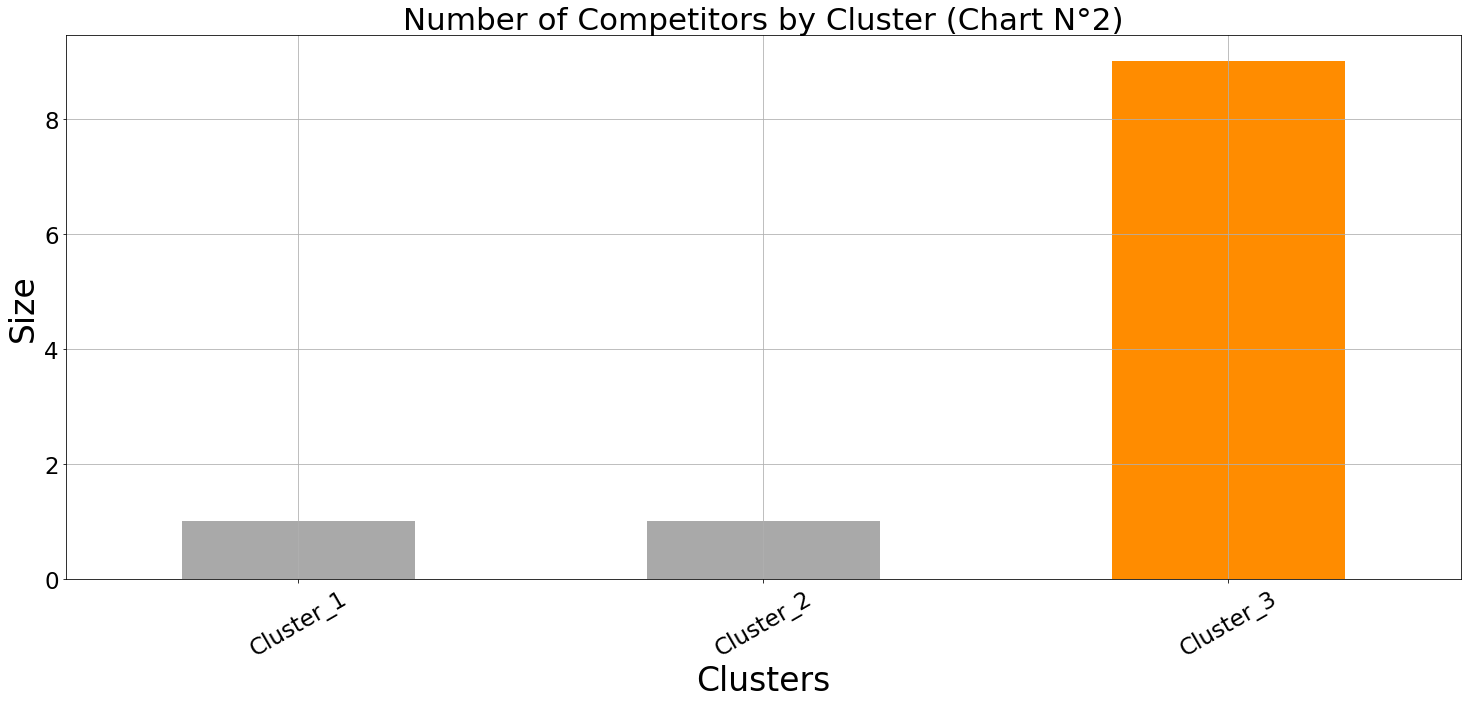

In [450]:
colors = ['darkgrey', 'darkgrey', 'darkorange']
clusters_dataframe["size"].plot(kind='bar', figsize=(25, 10), rot=90, fontsize=23,  width=0.5, color=colors)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel('Clusters', size=33)
plt.ylabel('Size', size=33)
plt.grid(True)
plt.title('Number of Competitors by Cluster in Downtown Santiago (Chart N°2)', size=31)

The chart above show us that the cluster_1 which includes the neighborhood "Barrio Santa Elena" together with the cluster_2 stand out among the cluster of neighborhoods according to the number of competitors by cluster.

### Part 4.   Results   -   Discussion   -   Conclusion

### 4. Results

The results reflected that is possible to answer the initial question whether if it is possible to start a Hungarian restaurant or not according to the number of competitors within Downtown Santiago if the neighborhood with fewest competitors is chosen.

### 5. Discussion

On the one hand, one point to highlight is that the task perfectly clarified the initial question, leaving no doubts on the matter, but on the other hand, raised questions about whether it is better to perform new questions and searches or not.

As a recommendation for those who start operating a Hungarian restaurant or any type of restaurant within Downtown Santiago, look for the place with the fewest competitors nearby is a good idea but it is necessary to think over the problem because this question don't answer all the perspectives to clarify the best spot to place it.

### 7. Conclusion

As a consequence of the results, it is possible to answer the question that is to clarify and locate what is the neighborhood with the fewest competitors in downtown Santiago.

The answers are the neighborhood called "Barrio Santa Elena" and the location is shown in the “Visualization N°3”. But due to the amount of information collected during the task is not enough, it is possible to conclude that it is necessary to perform new questions and analyzes to make sure where place is the best to open a Hungarian restaurant.


### Reference

1. Communes and Neighborhoods of Chile.
https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile


2. Main Neighborhoods of Santiago City.
https://www.google.com/maps/d/viewer?ie=UTF8&oe=UTF8&msa=0&mid=1ACWDQ2UW_t_jLBHcV49D4CuIWLE&ll=-33.49700571058003%2C-70.633807&z=11
    
    
3. Main Neighborhoods of Downtown Santiago. 
https://es.wikipedia.org/wiki/Anexo:Barrios_de_Santiago_de_Chile 